### Step 1: Load and Inspect the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Path to your file
file_path = '../data/raw/stock_prices.csv'

# Read the CSV
# header=[0, 1, 2] tells pandas that the first 3 rows are headers (Price, Ticker, etc.)
# This is crucial for the file you downloaded from Kaggle/yfinance
df = pd.read_csv(file_path, index_col=0, parse_dates=True, header=[0, 1, 2])

# Show the raw structure
print("Raw Data Structure:")
print(df.head())

# Check if we have numbers (float) or text (object)
print("\nData Types:")
print(df.dtypes.head())

Raw Data Structure:
Ticker                   ^VIX                                        \
Price                    Open               High                Low   
Date       Unnamed: 1_level_2 Unnamed: 2_level_2 Unnamed: 3_level_2   
2020-01-02              13.46          13.720000              12.42   
2020-01-03              15.01          16.200001              13.13   
2020-01-06              15.45          16.389999              13.54   
2020-01-07              13.84          14.460000              13.39   
2020-01-08              15.16          15.240000              12.83   

Ticker                                                        ^GSPC  \
Price                   Close             Volume               Open   
Date       Unnamed: 4_level_2 Unnamed: 5_level_2 Unnamed: 6_level_2   
2020-01-02              12.47                  0        3244.669922   
2020-01-03              14.02                  0        3226.360107   
2020-01-06              13.85                  0        

### Step 2: Clean the Header and Extract Close Prices

In [2]:
# 1. Simplify the MultiIndex
# The columns are (Ticker, Price, Date_Level_2). We only care about Ticker and Price.
# Let's drop the 3rd level (Date/Unnamed) which is useless.
df.columns = df.columns.droplevel(2)

print("Columns after dropping level 2:")
print(df.columns)

# 2. Extract Close Prices
# We want a DataFrame where columns are Tickers and values are Close prices.
close_prices = pd.DataFrame()
tickers = ['AAPL', 'MSFT', 'TSLA', '^GSPC', '^VIX', '^TNX']

for ticker in tickers:
    try:
        # Access the column (Ticker, Close)
        # Note: Depending on how pandas read it, it might be (Ticker, Close) or (Close, Ticker)
        # Based on your output: Ticker is Level 0, Price is Level 1.
        close_prices[ticker] = df[ticker]['Close']
    except KeyError:
        print(f"Warning: Could not find Close for {ticker}")

print("\nCleaned Close Prices:")
print(close_prices.head())

Columns after dropping level 2:
MultiIndex([( '^VIX',   'Open'),
            ( '^VIX',   'High'),
            ( '^VIX',    'Low'),
            ( '^VIX',  'Close'),
            ( '^VIX', 'Volume'),
            ('^GSPC',   'Open'),
            ('^GSPC',   'High'),
            ('^GSPC',    'Low'),
            ('^GSPC',  'Close'),
            ('^GSPC', 'Volume'),
            ( 'TSLA',   'Open'),
            ( 'TSLA',   'High'),
            ( 'TSLA',    'Low'),
            ( 'TSLA',  'Close'),
            ( 'TSLA', 'Volume'),
            ( 'MSFT',   'Open'),
            ( 'MSFT',   'High'),
            ( 'MSFT',    'Low'),
            ( 'MSFT',  'Close'),
            ( 'MSFT', 'Volume'),
            ( '^TNX',   'Open'),
            ( '^TNX',   'High'),
            ( '^TNX',    'Low'),
            ( '^TNX',  'Close'),
            ( '^TNX', 'Volume'),
            ( 'AAPL',   'Open'),
            ( 'AAPL',   'High'),
            ( 'AAPL',    'Low'),
            ( 'AAPL',  'Close'),
           

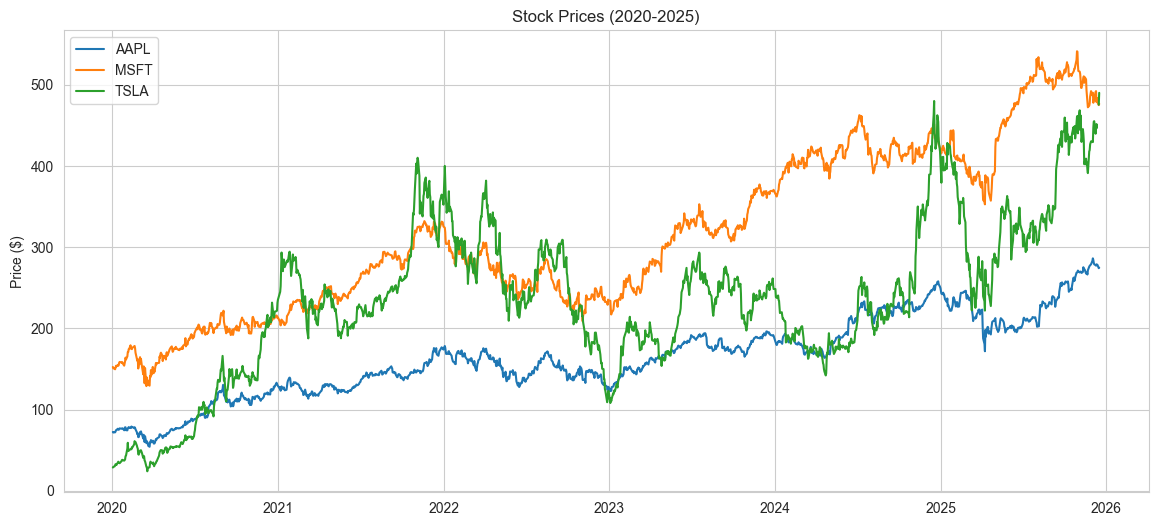

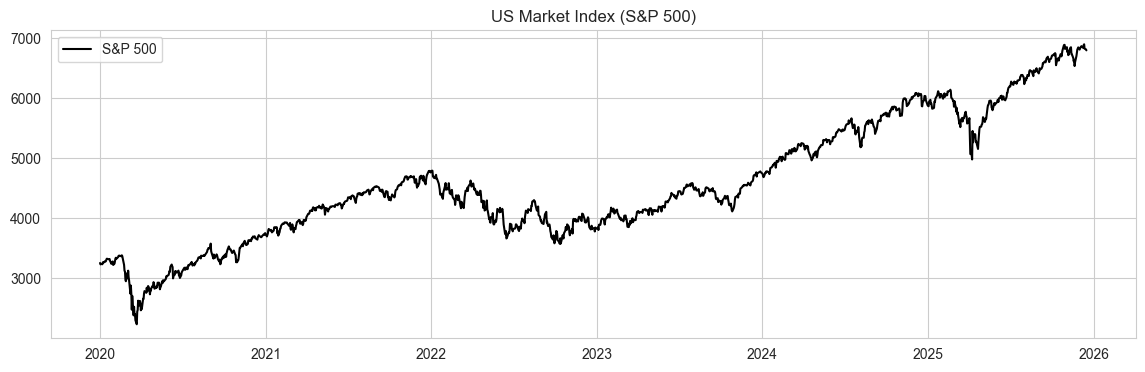

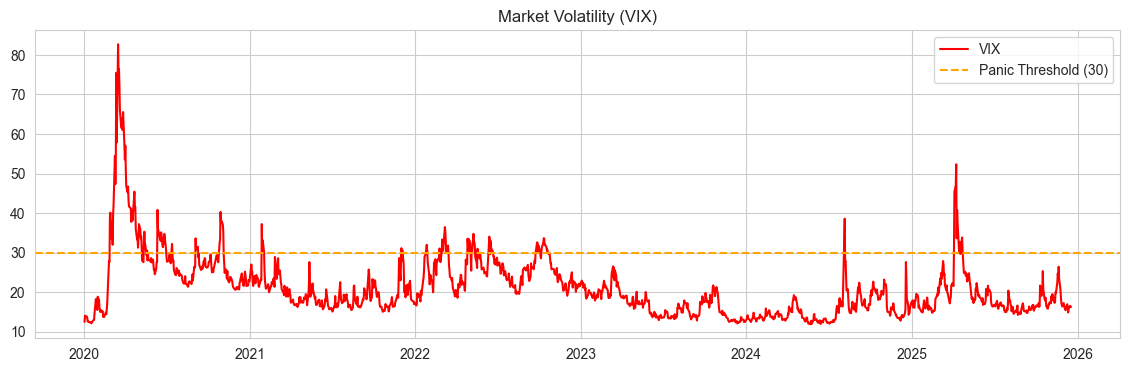

In [3]:
import seaborn as sns

sns.set_style('whitegrid')

# Plot 1: The Stocks (AAPL, MSFT, TSLA)
plt.figure(figsize=(14, 6))
for col in ['AAPL', 'MSFT', 'TSLA']:
    plt.plot(close_prices.index, close_prices[col], label=col)
plt.title('Stock Prices (2020-2025)')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

# Plot 2: The Market Index (S&P 500)
plt.figure(figsize=(14, 4))
plt.plot(close_prices.index, close_prices['^GSPC'], color='black', label='S&P 500')
plt.title('US Market Index (S&P 500)')
plt.legend()
plt.show()

# Plot 3: The Fear Index (VIX)
plt.figure(figsize=(14, 4))
plt.plot(close_prices.index, close_prices['^VIX'], color='red', label='VIX')
plt.title('Market Volatility (VIX)')
plt.axhline(y=30, color='orange', linestyle='--', label='Panic Threshold (30)')
plt.legend()
plt.show()

In [4]:
# Save the cleaned Close Prices to a new CSV
# We will use this file for the next notebook (Feature Engineering)
output_path = '../data/raw/cleaned_close_prices.csv'
close_prices.to_csv(output_path)

print(f"Cleaned data saved to: {output_path}")
print("Ready for Feature Engineering!")

Cleaned data saved to: ../data/raw/cleaned_close_prices.csv
Ready for Feature Engineering!
